# Support Vector Machines

Stanford CS229 - Machine Learning by Andrew Ng. Programming exercise 6.

Please check out [the repository on GitHub](https://github.com/rickwierenga/CS229-Python/). If you spot any mistakes or inconcistencies, please create an issue. For questions you can find me on Twitter: [@rickwierenga](https://twitter.com/rickwierenga). Starring the project on GitHub means a ton to me!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy.io as sio
%matplotlib inline

You should use a support vector machine when 

## Support Vector Machines
---
In the first half of this exercise, you will be using support vector machines (SVMs) with various example 2D datasets. Experimenting with these datasets will help you gain an intuition of how SVMs work and how to use a Gaussian kernel with SVMs. In the next half of the exercise, you will be using support vector machines to build a spam classifier.

In [2]:
# Load data
data = sio.loadmat("ex6data1.mat")
X = data["X"]
y = data["y"].flatten()

### Visualising the data

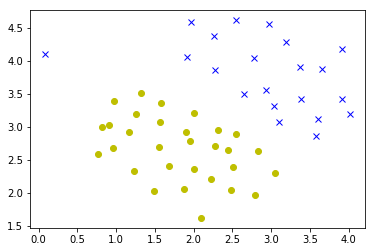

In [3]:
pos = np.where(y==1)[0]
neg = np.where(y==0)[0]

plt.plot(X[pos, 0], X[pos, 1], 'bx')
plt.plot(X[neg, 0], X[neg, 1], 'yo')

### Training  a linear SVM
Remember: high variance = overfit, high bias = underfit.

$C$ is the regularization parameter for SVMs where $\lambda$ was the regularization parameter for logistic regression.

$$C = \frac{1}{\lambda}$$

Training an SVM in Python can be done using `SciKit Learn`. How this works internally, is beyond the scope of these notebooks.

In [4]:
from sklearn.svm import SVC

In [5]:
def train_svm(X, y, **params):
    """ Train an SVM with data X, y and regularization parameter C """
    
    model = SVC(**params)
    clf = model.fit(X, y)
    return clf

In [6]:
def plot_svm_decision_boundary(clf):
    """ Plot the decision boundary for an SVM """
    w = clf.coef_[0]
    a = -w[0] / w[1]

    xp = np.array(np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100))
    yp = a * xp - (clf.intercept_[0]) / w[1]
    plt.plot(xp, yp, '-k')
    plt.plot(X[pos, 0], X[pos, 1], 'bx')
    plt.plot(X[neg, 0], X[neg, 1], 'yo')

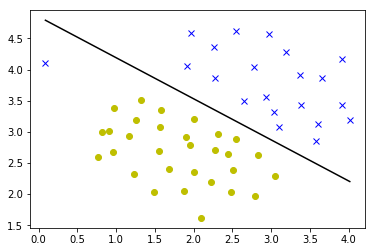

In [7]:
# Decision boundary with C=1. Notice that one example is not classified correctly.
clf = train_svm(X, y, kernel='linear')
plot_svm_decision_boundary(clf)

[1] (51, 2) (51,)


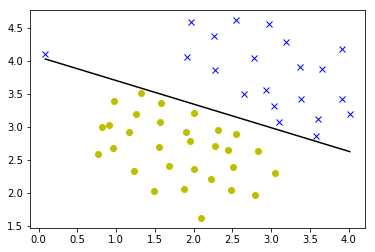

In [8]:
# Decision boundary with C=100. All examples are classified correctly but the boundary does not seem a natural fit.
clf = train_svm(X, y, C=100, kernel='linear')
print(clf.predict(X[0].reshape(1, 2)), X.shape, y.shape)
plot_svm_decision_boundary(clf)

## SVM with Gaussian Kernels
---
To find non-linear decision boundaries with the SVM, we need to first im- plement a Gaussian kernel. You can think of the Gaussian kernel as a sim- ilarity function that measures the “distance” between a pair of examples, $(x^{(i)},x^{(j)})$. The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases (to 0) as the examples are further apart.

The Gaussian Kernel is defined as:

$$K_{gaussian}(x^{(i)}, x^{(j)}) = \exp\left(-\frac{\left\lVert x^{(i)} - x^{(j)} \right\rVert ^ 2}{2\sigma^2}\right) = \exp\left(-\frac{\displaystyle\sum_{k=1}^{n}(x_k^{(i)} - x_k^{(j)})^2}{2\sigma^2}\right)$$.

**Exercise**: Implement the Gaussian kernal function.

In [9]:
from sklearn.metrics.pairwise import euclidean_distances

def gaussian_wrapper(sigma):
    def gaussian_kernel(x1, x2):
        # Placeholder. Remove this line.
        return x1 @ x2.T
    
    return gaussian_kernel

The following code should return approximately $0.324652$.

In [10]:
x1 = np.array([[1, 2, 1]])
x2 = np.array([[0, 4, -1]])
gaussian_wrapper(2)(x1, x2)

array([[7]])

### Dataset 2

In [11]:
data = sio.loadmat("ex6data2.mat")
X = data["X"]
y = data["y"].flatten()

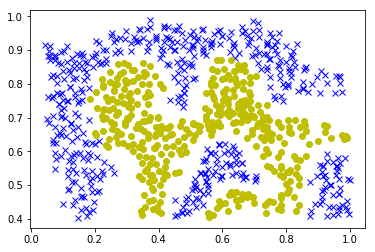

In [12]:
pos = np.where(y==1)[0]
neg = np.where(y==0)[0]

plt.plot(X[pos, 0], X[pos, 1], 'bx')
plt.plot(X[neg, 0], X[neg, 1], 'yo')

In [13]:
clf = SVC(C=1, kernel = gaussian_wrapper(0.1))
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel=<function gaussian_wrapper.<locals>.gaussian_kernel at 0x121dda048>,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

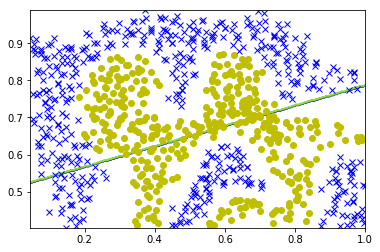

In [14]:
xp1 = np.array(np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 200))
xp2 = np.array(np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 200))
xp1_mesh, xp2_mesh = np.meshgrid(xp1, xp2)
grid = np.array(list(zip(xp1_mesh.flatten(), xp2_mesh.flatten())))
prediction_grid = clf.predict(grid).reshape((200, 200))
plt.contour(xp1, xp2, prediction_grid)
plt.plot(X[pos, 0], X[pos, 1], 'bx')
plt.plot(X[neg, 0], X[neg, 1], 'yo')

### Dataset 3

In [15]:
data = sio.loadmat("ex6data3.mat")
X = data["X"]
y = data["y"].flatten()

In [16]:
pos = np.where(y==1)[0]
neg = np.where(y==0)[0]

In [17]:
clf = SVC(C=2, kernel = gaussian_wrapper(0.1))
clf.fit(X, y)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel=<function gaussian_wrapper.<locals>.gaussian_kernel at 0x12253b730>,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

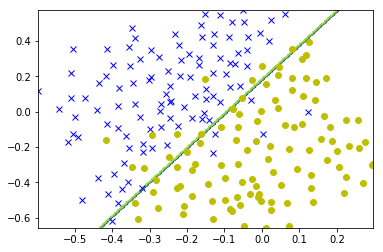

In [18]:
xp1 = np.array(np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 200))
xp2 = np.array(np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 200))
xp1_mesh, xp2_mesh = np.meshgrid(xp1, xp2)
grid = np.array(list(zip(xp1_mesh.flatten(), xp2_mesh.flatten())))
prediction_grid = clf.predict(grid).reshape((200, 200))
plt.contour(xp1, xp2, prediction_grid)
plt.plot(X[pos, 0], X[pos, 1], 'bx')
plt.plot(X[neg, 0], X[neg, 1], 'yo')

## Spam Classification
---
Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the exercise, you will use SVMs to build your own spam filter.

You will be training a classifier to classify whether a given email, x, is spam ($y = 1$) or non-spam ($y = 0$). In particular, you need to convert each email into a feature vector $x \in \mathbb{R}^n$. The following parts of the exercise will walk you through how such a feature vector can be constructed from an email.

### Strategy
Before starting on a machine learning task, it is usually insightful to take a look at examples from the dataset. Figure 8 shows a sample email that contains a URL, an email address (at the end), numbers, and dollar amounts. While many emails would contain similar types of entities (e.g., numbers, other URLs, or other email addresses), the specific entities (e.g., the specific URL or specific dollar amount) will be different in almost every email. Therefore, one method often employed in processing emails is to “normalize” these values, so that all URLs are treated the same, all numbers are treated the same, etc. For example, we could replace each URL in the email with the unique string “httpaddr” to indicate that a URL was present.

This has the effect of letting the spam classifier make a classification decision based on whether any URL was present, rather than whether a specific URL was present. This typically improves the performance of a spam classifier, since spammers often randomize the URLs, and thus the odds of seeing any particular URL again in a new piece of spam is very small.

### Preprocessing
In `process_email.py`, I have implemented the following email preprocessing and normalization steps:
- Lower-casing: The entire email is converted into lower case, so that captialization is ignored (e.g., IndIcaTE is treated the same as indicate).
- Stripping HTML: All HTML tags are removed from the emails. Many emails often come with HTML formatting; we remove all the HTML tags, so that only the content remains.
- Normalizing URLs: All URLs are replaced with the text “httpaddr”.
- Normalizing Email Addresses: All email addresses are replaced
with the text “emailaddr”.
- Normalizing Numbers: All numbers are replaced with the text
“number”.
- Normalizing Dollars: All dollar signs ($) are replaced with the text
“dollar”.
- Word Stemming: Words are reduced to their stemmed form. For example, “discount”, “discounts”, “discounted” and “discounting” are all replaced with “discount”. Sometimes, the Stemmer actually strips off additional characters from the end, so “include”, “includes”, “included”, and “including” are all replaced with “includ”.
- Removal of non-words: Non-words and punctuation have been removed. All white spaces (tabs, newlines, spaces) have all been trimmed to a single space character.

In [19]:
from process_email import *

# Demo of the process_email function. 
# Note: the indexes are all one lower than the exercise, because Python is 0-indexed where Octave is 1-indexed.
with open('emailSample1.txt', 'r') as email:
    email_contents = email.read()
    tokens = process_email(email_contents)
    print(tokens)

[85, 915, 793, 1076, 882, 369, 1698, 789, 1821, 1830, 882, 430, 1170, 793, 1001, 1892, 1363, 591, 1675, 237, 161, 88, 687, 944, 1662, 1119, 1061, 1698, 374, 1161, 478, 1892, 1509, 798, 1181, 1236, 809, 1894, 1439, 1546, 180, 1698, 1757, 1895, 687, 1675, 991, 960, 1476, 70, 529, 1698, 530]


You will now implement the feature extraction that converts each email into a vector in $\mathbb{R}^n$. For this exercise, you will be using $n = \#$ words in vocabulary list. Specifically, the feature $x_i \in \{0, 1\}$ for an email corresponds to whether the i-th word in the dictionary occurs in the email. That is, $x_i = 1$ if the i-th word is in the email and $x_i = 0$ if the i-th word is not present in the email.
Thus, for a typical email, this feature would look like:
$$
x = \begin{bmatrix}
0 \\
\vdots \\
1 \\
0 \\
\vdots \\
1 \\
0 \\
\vdots \\
0
\end{bmatrix} \in \mathbb{R}^n
$$.

**Exercise**: Implement `extract_features`.

In [20]:
def extract_features(tokens):
    return np.zeros((1899, 1))

The following code should return 45.

In [21]:
features = extract_features(tokens)
np.count_nonzero(features)

0

### Training an SVM for spam classification

In [22]:
training_data = sio.loadmat("spamTrain.mat")
X = training_data["X"]
y = training_data["y"].flatten()

In [23]:
spam_predictor = SVC(C=0.1, kernel='linear')
spam_predictor.fit(X, y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
predictions = spam_predictor.predict(X)
'Training accuracy: {:2f}%'.format(np.mean(predictions == y) * 100)

'Training accuracy: 99.825000%'

In [25]:
testing_data = sio.loadmat("spamTest.mat")
X_test = testing_data["Xtest"]
y_test = testing_data["ytest"].flatten()

predictions = spam_predictor.predict(X_test)
'Test accuracy: {:2f}%'.format(np.mean(predictions == y_test) * 100)

'Test accuracy: 98.900000%'

### Top predictors

To better understand how the spam classifier works, we can inspect the parameters to see which words the classifier thinks are the most predictive of spam.

In [26]:
weights = spam_predictor.coef_[0]
df = pd.DataFrame({'vocabulary': vocabulary, 'weights': weights})
df.sort_values(by='weights', ascending = False).head()

,vocabulary,weights
1190,our,0.500614
297,click,0.465916
1397,remov,0.422869
738,guarante,0.383622
1795,visit,0.367710
